<a href="https://colab.research.google.com/github/Mabukhanpathan/Scientific-Cal/blob/master/ImageClassificationUsingDensenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras import layers

In [7]:
import tensorflow as tf

In [8]:
import matplotlib.pyplot as plt

In [10]:
# DenseNet model definition
def dense_net(input_shape, num_classes):
    def dense_block(x, num_layers, growth_rate):
        for _ in range(num_layers):
            y = layers.BatchNormalization()(x)
            y = layers.Activation('relu')(y)
            y = layers.Conv2D(growth_rate, 3, padding='same')(y)
            x = layers.Concatenate()([x, y])
        return x

    def transition_block(x):
        x = layers.BatchNormalization()(x)
        x = layers.Activation('relu')(x)
        x = layers.Conv2D(x.shape[-1] // 2, 1, padding='same')(x)
        # Check if height is odd
        if x.shape[1] % 2 == 1:
          x = layers.ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
        x = layers.AveragePooling2D(2, strides=2)(x)
        return x

    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(3, strides=2, padding='same')(x)

    num_layers = [6, 12, 24, 16]
    growth_rate = 32
    for num_layer in num_layers:
        x = dense_block(x, num_layer, growth_rate)
        x = transition_block(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, x)
    return model

In [11]:
# HERE WE ARE LoadING THE  CIFAR-10 dataset AND WE ARE ASSIGINING THE DATASET TO TRAIN AND TEST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Select a subset of the dataset
subset_size = 1500
x_train = x_train[:subset_size]
y_train = y_train[:subset_size]

# Preprocess the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Create and compile the DenseNet model
model = dense_net(input_shape=(32, 32, 3), num_classes=10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

170498071/170498071 [==============================] - 2s 0us/step


In [12]:

# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
24/24 [==============================] - 72s 435ms/step - loss: 2.0324 - accuracy: 0.2693 - val_loss: 2.8375 - val_accuracy: 0.1150
Epoch 2/10
24/24 [==============================] - 4s 164ms/step - loss: 1.7886 - accuracy: 0.3620 - val_loss: 2.4519 - val_accuracy: 0.1008
Epoch 3/10
24/24 [==============================] - 4s 163ms/step - loss: 1.5809 - accuracy: 0.4040 - val_loss: 2.6978 - val_accuracy: 0.1035
Epoch 4/10
24/24 [==============================] - 4s 178ms/step - loss: 1.4186 - accuracy: 0.4893 - val_loss: 2.5332 - val_accuracy: 0.1384
Epoch 5/10
24/24 [==============================] - 4s 163ms/step - loss: 1.2964 - accuracy: 0.5240 - val_loss: 3.4062 - val_accuracy: 0.1167
Epoch 6/10
24/24 [==============================] - 4s 163ms/step - loss: 1.1681 - accuracy: 0.5887 - val_loss: 3.5910 - val_accuracy: 0.1273
Epoch 7/10
24/24 [==============================] - 4s 168ms/step - loss: 1.1196 - accuracy: 0.5973 - val_loss: 3.3764 - val_accuracy: 0.1398
Epoch

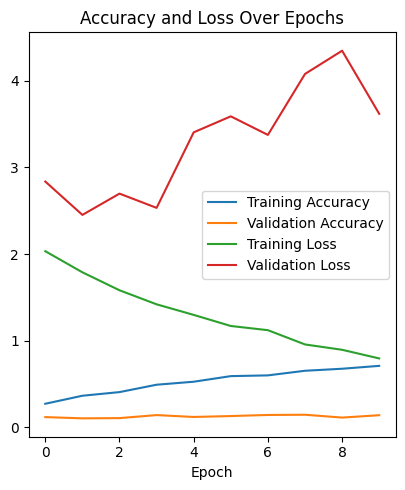

In [13]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 4)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Accuracy and Loss Over Epochs')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()